In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


In [2]:
# Create a series of scatterplots to showcase the following relationships:
# Temperature (F) vs. Latitude
# Humidity (%) vs. Latitude
# Cloudiness (%) vs Latitude
# Wind Speed (mph) vs. Latitude

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#cities

602

In [5]:
# Perform API Calls
## Perform a weather check on each city using a series of successive API calls.
url = "http://api.openweathermap.org/data/2.5/weather?"

#city = "east london"
# Build query URL
##query_url = f'{url}appid={weather_api_key}&q={city}'       #&id={city_id}'

# get weather data
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()




In [6]:
# Convert Raw Data to DataFrame
# lat, lon, temp, humidity, cloudiness, windspeed
lon = []
lat = []
temp = [] 
max_temp = []
humidity = []
clouds = []
windspeed = []
city_list = []
city_id_list = []
country_list = []

In [8]:
#weather_response = requests.get(query_url)
#weather_json = weather_response.json()

#weather_json

In [9]:
for city in cities:   #subset_cities:
    query_url = f'{url}appid={weather_api_key}&q={city}&units=imperial'

    try:
        # get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        city_id_list.append(weather_json['id'])
        lon.append(weather_json['coord']['lon'])
        lat.append(weather_json['coord']['lat'])
        temp.append(weather_json['main']['temp'])
        max_temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        windspeed.append(weather_json['wind']['speed']) 
        #Add the city last after everything else works
        print(f'City is: {city}.')
        city_list.append(weather_json['name'])
        country_list.append(weather_json['sys']['country'])
        print(weather_json)
    except:
        print(f'EXCEPTION: {weather_json} for {city}')
    time.sleep(2)
    

City is: ushuaia.
{'coord': {'lon': -68.3, 'lat': -54.8}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 46.4, 'feels_like': 23.61, 'temp_min': 46.4, 'temp_max': 46.4, 'pressure': 989, 'humidity': 81}, 'visibility': 10000, 'wind': {'speed': 36.82, 'deg': 230, 'gust': 47.18}, 'rain': {'1h': 0.26}, 'clouds': {'all': 75}, 'dt': 1614140864, 'sys': {'type': 1, 'id': 8303, 'country': 'AR', 'sunrise': 1614160005, 'sunset': 1614210381}, 'timezone': -10800, 'id': 3833367, 'name': 'Ushuaia', 'cod': 200}
City is: tasiilaq.
{'coord': {'lon': -37.6368, 'lat': 65.6145}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 23, 'feels_like': 16.25, 'temp_min': 23, 'temp_max': 23, 'pressure': 997, 'humidity': 74}, 'visibility': 10000, 'wind': {'speed': 2.48, 'deg': 305, 'gust': 3.36}, 'clouds': {'all': 20}, 'dt': 1614140867, 'sys': {'type': 1, 'id': 81, 'co

City is: touros.
{'coord': {'lon': -35.4608, 'lat': -5.1989}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 78.8, 'feels_like': 86.83, 'temp_min': 78.8, 'temp_max': 78.8, 'pressure': 1013, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 210}, 'clouds': {'all': 20}, 'dt': 1614140897, 'sys': {'type': 1, 'id': 8452, 'country': 'BR', 'sunrise': 1614155304, 'sunset': 1614199321}, 'timezone': -10800, 'id': 3386213, 'name': 'Touros', 'cod': 200}
City is: northam.
{'coord': {'lon': -4.2167, 'lat': 51.0333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 54.34, 'feels_like': 45.43, 'temp_min': 54, 'temp_max': 55, 'pressure': 1017, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 17, 'deg': 215, 'gust': 32.01}, 'clouds': {'all': 100}, 'dt': 1614140900, 'sys': {'type': 3, 'id': 2005965, 'country': 'GB', 'sunris

City is: mar del plata.
{'coord': {'lon': -57.5575, 'lat': -38.0023}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.94, 'feels_like': 56.35, 'temp_min': 60.01, 'temp_max': 62.01, 'pressure': 1016, 'humidity': 72}, 'visibility': 8000, 'wind': {'speed': 9.22, 'deg': 180}, 'clouds': {'all': 75}, 'dt': 1614140933, 'sys': {'type': 1, 'id': 8305, 'country': 'AR', 'sunrise': 1614158987, 'sunset': 1614206243}, 'timezone': -10800, 'id': 3430863, 'name': 'Mar del Plata', 'cod': 200}
City is: vardo.
{'coord': {'lon': 31.1107, 'lat': 70.3705}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 21.2, 'feels_like': 9.36, 'temp_min': 21.2, 'temp_max': 21.2, 'pressure': 1012, 'humidity': 79}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 250}, 'clouds': {'all': 20}, 'dt': 1614140935, 'sys': {'type': 1, 'id': 1682, 'country': 'NO', 'sunrise

City is: jumla.
{'coord': {'lon': 82.1838, 'lat': 29.2747}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 55.74, 'feels_like': 49.69, 'temp_min': 55.74, 'temp_max': 55.74, 'pressure': 1018, 'humidity': 34, 'sea_level': 1018, 'grnd_level': 775}, 'visibility': 10000, 'wind': {'speed': 3.38, 'deg': 275}, 'clouds': {'all': 0}, 'dt': 1614140969, 'sys': {'country': 'NP', 'sunrise': 1614128536, 'sunset': 1614169625}, 'timezone': 20700, 'id': 1283285, 'name': 'Jumla', 'cod': 200}
City is: jaguarari.
{'coord': {'lon': -40.1958, 'lat': -10.2639}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 68.81, 'feels_like': 70.9, 'temp_min': 68.81, 'temp_max': 68.81, 'pressure': 1013, 'humidity': 84, 'sea_level': 1013, 'grnd_level': 939}, 'visibility': 10000, 'wind': {'speed': 4.74, 'deg': 143}, 'clouds': {'all': 33}, 'dt': 1614140972, 'sys': {'cou

City is: kamaishi.
{'coord': {'lon': 141.8833, 'lat': 39.2667}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 30.2, 'feels_like': 18.03, 'temp_min': 30.2, 'temp_max': 30.2, 'pressure': 1018, 'humidity': 64}, 'visibility': 10000, 'wind': {'speed': 12.66, 'deg': 290, 'gust': 24.16}, 'clouds': {'all': 40}, 'dt': 1614141002, 'sys': {'type': 1, 'id': 8047, 'country': 'JP', 'sunrise': 1614114784, 'sunset': 1614154724}, 'timezone': 32400, 'id': 2112444, 'name': 'Kamaishi', 'cod': 200}
City is: butaritari.
{'coord': {'lon': 172.7902, 'lat': 3.0707}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 81.68, 'feels_like': 81.95, 'temp_min': 81.68, 'temp_max': 81.68, 'pressure': 1003, 'humidity': 80, 'sea_level': 1003, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 17.81, 'deg': 71}, 'clouds': {'all': 44}, 'dt': 1614141004, 'sys'

City is: theodoriana.
{'coord': {'lon': 21.21, 'lat': 39.4356}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 46.4, 'feels_like': 42.33, 'temp_min': 46.4, 'temp_max': 46.4, 'pressure': 1030, 'humidity': 100}, 'visibility': 10000, 'wind': {'speed': 5.75, 'deg': 50}, 'clouds': {'all': 0}, 'dt': 1614141035, 'sys': {'type': 1, 'id': 6638, 'country': 'GR', 'sunrise': 1614143728, 'sunset': 1614183697}, 'timezone': 7200, 'id': 254746, 'name': 'Theodoriana', 'cod': 200}
City is: naze.
{'coord': {'lon': 129.4833, 'lat': 28.3667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 67.75, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1018, 'humidity': 60}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 70}, 'clouds': {'all': 40}, 'dt': 1614141037, 'sys': {'type': 1, 'id': 8013, 'country': 'JP', 'sunrise': 161411714

City is: samarinda.
{'coord': {'lon': 117.15, 'lat': -0.5}, 'weather': [{'id': 502, 'main': 'Rain', 'description': 'heavy intensity rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 82.65, 'feels_like': 92.14, 'temp_min': 82.65, 'temp_max': 82.65, 'pressure': 1006, 'humidity': 84, 'sea_level': 1006, 'grnd_level': 1006}, 'visibility': 9066, 'wind': {'speed': 4.03, 'deg': 53}, 'rain': {'1h': 5.615}, 'clouds': {'all': 100}, 'dt': 1614141072, 'sys': {'country': 'ID', 'sunrise': 1614118867, 'sunset': 1614162512}, 'timezone': 28800, 'id': 1629001, 'name': 'Samarinda', 'cod': 200}
EXCEPTION: {'cod': '404', 'message': 'city not found'} for tumannyy
EXCEPTION: {'cod': '404', 'message': 'city not found'} for tsihombe
City is: souillac.
{'coord': {'lon': 57.5167, 'lat': -20.5167}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 83.19, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 10

City is: yangjiang.
{'coord': {'lon': 111.9667, 'lat': 21.85}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 73.36, 'feels_like': 71.62, 'temp_min': 73.36, 'temp_max': 73.36, 'pressure': 1014, 'humidity': 65, 'sea_level': 1014, 'grnd_level': 1011}, 'visibility': 10000, 'wind': {'speed': 9.51, 'deg': 104}, 'clouds': {'all': 99}, 'dt': 1614141113, 'sys': {'country': 'CN', 'sunrise': 1614121039, 'sunset': 1614162828}, 'timezone': 28800, 'id': 1806408, 'name': 'Yangjiang', 'cod': 200}
City is: ostrovnoy.
{'coord': {'lon': 39.5131, 'lat': 68.0531}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 7.97, 'feels_like': -10.37, 'temp_min': 7.97, 'temp_max': 7.97, 'pressure': 1021, 'humidity': 92, 'sea_level': 1021, 'grnd_level': 1018}, 'visibility': 5322, 'wind': {'speed': 21.9, 'deg': 214}, 'clouds': {'all': 100}, 'dt': 1614141115,

City is: eregli.
{'coord': {'lon': 34.0467, 'lat': 37.5133}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 32.22, 'feels_like': 28.04, 'temp_min': 32.22, 'temp_max': 32.22, 'pressure': 1027, 'humidity': 90, 'sea_level': 1027, 'grnd_level': 902}, 'visibility': 10000, 'wind': {'speed': 0.49, 'deg': 35}, 'clouds': {'all': 0}, 'dt': 1614141148, 'sys': {'country': 'TR', 'sunrise': 1614140532, 'sunset': 1614180733}, 'timezone': 10800, 'id': 315498, 'name': 'Heraclea', 'cod': 200}
City is: mount gambier.
{'coord': {'lon': 140.7667, 'lat': -37.8333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 64.4, 'feels_like': 58.17, 'temp_min': 64.4, 'temp_max': 64.4, 'pressure': 1019, 'humidity': 45}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 230}, 'clouds': {'all': 90}, 'dt': 1614141150, 'sys': {'type': 1, 'id': 9560, 'country': 'AU',

City is: grand gaube.
{'coord': {'lon': 57.6608, 'lat': -20.0064}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.99, 'feels_like': 88.95, 'temp_min': 82.99, 'temp_max': 82.99, 'pressure': 1013, 'humidity': 75}, 'visibility': 10000, 'wind': {'speed': 7, 'deg': 109, 'gust': 13}, 'clouds': {'all': 61}, 'dt': 1614141183, 'sys': {'type': 3, 'id': 2002134, 'country': 'MU', 'sunrise': 1614132317, 'sunset': 1614177614}, 'timezone': 14400, 'id': 934479, 'name': 'Grand Gaube', 'cod': 200}
EXCEPTION: {'cod': '404', 'message': 'city not found'} for illoqqortoormiut
EXCEPTION: {'cod': '404', 'message': 'city not found'} for grand centre
City is: upernavik.
{'coord': {'lon': -56.1549, 'lat': 72.7868}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 6.71, 'feels_like': -4.31, 'temp_min': 6.71, 'temp_max': 6.71, 'pressure': 1005, 'humidi

EXCEPTION: {'cod': '404', 'message': 'city not found'} for kawana waters
City is: aguimes.
{'coord': {'lon': -15.4461, 'lat': 27.9054}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 60.57, 'feels_like': 52.75, 'temp_min': 57.99, 'temp_max': 62.6, 'pressure': 1022, 'humidity': 67}, 'visibility': 10000, 'wind': {'speed': 13.8, 'deg': 350}, 'clouds': {'all': 40}, 'dt': 1614141224, 'sys': {'type': 1, 'id': 2378, 'country': 'ES', 'sunrise': 1614151883, 'sunset': 1614193136}, 'timezone': 0, 'id': 2522325, 'name': 'Agüimes', 'cod': 200}
City is: pereslavl-zalesskiy.
{'coord': {'lon': 38.8563, 'lat': 56.7393}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -6.32, 'feels_like': -18.11, 'temp_min': -6.32, 'temp_max': -6.32, 'pressure': 1039, 'humidity': 88, 'sea_level': 1039, 'grnd_level': 1020}, 'visibility': 10000, 'wind': {'spe

City is: faanui.
{'coord': {'lon': -151.75, 'lat': -16.4833}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.31, 'feels_like': 86.76, 'temp_min': 82.31, 'temp_max': 82.31, 'pressure': 1009, 'humidity': 70, 'sea_level': 1009, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 7.05, 'deg': 26}, 'clouds': {'all': 70}, 'dt': 1614141261, 'sys': {'country': 'PF', 'sunrise': 1614096328, 'sunset': 1614141327}, 'timezone': -36000, 'id': 4034551, 'name': 'Faanui', 'cod': 200}
City is: lompoc.
{'coord': {'lon': -120.4579, 'lat': 34.6391}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 54.01, 'feels_like': 50.63, 'temp_min': 50, 'temp_max': 59, 'pressure': 1017, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 26}, 'clouds': {'all': 1}, 'dt': 1614141263, 'sys': {'type': 1, 'id': 4747, 'country': 'US', 'sunrise':

City is: jutai.
{'coord': {'lon': -68.9, 'lat': -5.1833}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 73.04, 'feels_like': 80.37, 'temp_min': 73.04, 'temp_max': 73.04, 'pressure': 1010, 'humidity': 93, 'sea_level': 1010, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 1.36, 'deg': 34}, 'rain': {'1h': 1.538}, 'clouds': {'all': 98}, 'dt': 1614141293, 'sys': {'country': 'BR', 'sunrise': 1614163330, 'sunset': 1614207344}, 'timezone': -14400, 'id': 3663693, 'name': 'Jutaí', 'cod': 200}
City is: belle glade.
{'coord': {'lon': -80.6676, 'lat': 26.6845}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 67.28, 'feels_like': 67.15, 'temp_min': 66, 'temp_max': 69.01, 'pressure': 1020, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 7.36, 'deg': 88}, 'clouds': {'all': 8}, 'dt': 1614141296, 'sys': {'type': 3, 'id': 2019483, 'c

City is: dingle.
{'coord': {'lon': 122.6711, 'lat': 10.9995}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 85.87, 'feels_like': 90.73, 'temp_min': 85.87, 'temp_max': 85.87, 'pressure': 1007, 'humidity': 70, 'sea_level': 1007, 'grnd_level': 1004}, 'visibility': 10000, 'wind': {'speed': 9.69, 'deg': 62}, 'rain': {'1h': 0.365}, 'clouds': {'all': 96}, 'dt': 1614141331, 'sys': {'country': 'PH', 'sunrise': 1614118007, 'sunset': 1614160723}, 'timezone': 28800, 'id': 1714733, 'name': 'Dingle', 'cod': 200}
City is: dzerzhinsk.
{'coord': {'lon': 43.4631, 'lat': 56.2389}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': -23.4, 'feels_like': -32.33, 'temp_min': -23.8, 'temp_max': -23.01, 'pressure': 1040, 'humidity': 76}, 'visibility': 10000, 'wind': {'speed': 3.44, 'deg': 263}, 'clouds': {'all': 0}, 'dt': 1614141333, 'sys': {'type': 1, 'id': 9037,

City is: husavik.
{'coord': {'lon': -17.3389, 'lat': 66.0449}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}, {'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 32, 'feels_like': 26.49, 'temp_min': 32, 'temp_max': 32, 'pressure': 987, 'humidity': 100}, 'visibility': 5000, 'wind': {'speed': 3.44, 'deg': 350}, 'rain': {'1h': 0.21}, 'clouds': {'all': 90}, 'dt': 1614141372, 'sys': {'type': 1, 'id': 83, 'country': 'IS', 'sunrise': 1614156062, 'sunset': 1614189865}, 'timezone': 0, 'id': 2629833, 'name': 'Husavik', 'cod': 200}
City is: takoradi.
{'coord': {'lon': -1.7554, 'lat': 4.8845}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.48, 'feels_like': 84.96, 'temp_min': 78.48, 'temp_max': 78.48, 'pressure': 1011, 'humidity': 85, 'sea_level': 1011, 'grnd_level': 1009}, 'visibility': 10000, 'wind': {'speed': 5.44,

City is: yaan.
{'coord': {'lon': 8.5667, 'lat': 7.3833}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 70.38, 'feels_like': 73.87, 'temp_min': 70.38, 'temp_max': 70.38, 'pressure': 1012, 'humidity': 83, 'sea_level': 1012, 'grnd_level': 988}, 'visibility': 10000, 'wind': {'speed': 3.15, 'deg': 192}, 'clouds': {'all': 28}, 'dt': 1614141405, 'sys': {'country': 'NG', 'sunrise': 1614145238, 'sunset': 1614188256}, 'timezone': 3600, 'id': 2338660, 'name': 'Yaan', 'cod': 200}
City is: itapirapua.
{'coord': {'lon': -50.6133, 'lat': -15.8233}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 71.55, 'feels_like': 77.41, 'temp_min': 71.55, 'temp_max': 71.55, 'pressure': 1011, 'humidity': 93, 'sea_level': 1011, 'grnd_level': 972}, 'visibility': 10000, 'wind': {'speed': 2.62, 'deg': 123}, 'clouds': {'all': 2}, 'dt': 1614141407, 'sys': {'countr

City is: portree.
{'coord': {'lon': -6.1942, 'lat': 57.4129}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 48, 'feels_like': 26.85, 'temp_min': 48, 'temp_max': 48, 'pressure': 998, 'humidity': 77}, 'visibility': 10000, 'wind': {'speed': 34, 'deg': 359, 'gust': 47}, 'clouds': {'all': 100}, 'dt': 1614141440, 'sys': {'type': 3, 'id': 2006895, 'country': 'GB', 'sunrise': 1614151896, 'sunset': 1614188682}, 'timezone': 0, 'id': 2640006, 'name': 'Portree', 'cod': 200}
City is: dobrinka.
{'coord': {'lon': 40.4731, 'lat': 52.1653}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -16.2, 'feels_like': -23.57, 'temp_min': -16.2, 'temp_max': -16.2, 'pressure': 1046, 'humidity': 86, 'sea_level': 1046, 'grnd_level': 1024}, 'visibility': 10000, 'wind': {'speed': 0.89, 'deg': 224}, 'clouds': {'all': 86}, 'dt': 1614141442, 'sys': {'country

City is: saldanha.
{'coord': {'lon': 17.9442, 'lat': -33.0117}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 60.8, 'feels_like': 60.49, 'temp_min': 60.8, 'temp_max': 60.8, 'pressure': 1014, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 220}, 'clouds': {'all': 0}, 'dt': 1614141478, 'sys': {'type': 1, 'id': 1943, 'country': 'ZA', 'sunrise': 1614141172, 'sunset': 1614187821}, 'timezone': 7200, 'id': 3361934, 'name': 'Saldanha', 'cod': 200}
City is: ust-koksa.
{'coord': {'lon': 85.6108, 'lat': 50.2696}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 24.57, 'feels_like': 17.91, 'temp_min': 24.57, 'temp_max': 24.57, 'pressure': 1017, 'humidity': 93, 'sea_level': 1017, 'grnd_level': 899}, 'visibility': 466, 'wind': {'speed': 3.47, 'deg': 138}, 'snow': {'1h': 0.32}, 'clouds': {'all': 100}, 'dt': 1614141480, 'sys': {'cou

EXCEPTION: {'cod': '404', 'message': 'city not found'} for dzhusaly
City is: beberibe.
{'coord': {'lon': -38.1306, 'lat': -4.1797}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 80.6, 'feels_like': 87.03, 'temp_min': 80.6, 'temp_max': 80.6, 'pressure': 1012, 'humidity': 83}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 60}, 'clouds': {'all': 40}, 'dt': 1614141513, 'sys': {'type': 1, 'id': 8363, 'country': 'BR', 'sunrise': 1614155985, 'sunset': 1614199921}, 'timezone': -10800, 'id': 3405924, 'name': 'Beberibe', 'cod': 200}
City is: emerald.
{'coord': {'lon': 148.1667, 'lat': -23.5333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 94.55, 'feels_like': 92.03, 'temp_min': 93.99, 'temp_max': 95, 'pressure': 1007, 'humidity': 34}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 50}, 'clouds': {'all': 75}, 'dt': 1614

City is: margate.
{'coord': {'lon': 1.3862, 'lat': 51.3813}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 52.29, 'feels_like': 49.59, 'temp_min': 52, 'temp_max': 53.01, 'pressure': 1007, 'humidity': 71}, 'visibility': 10000, 'wind': {'speed': 1.99, 'deg': 181, 'gust': 8.01}, 'clouds': {'all': 100}, 'dt': 1614141550, 'sys': {'type': 3, 'id': 2020742, 'country': 'GB', 'sunrise': 1614149406, 'sunset': 1614187534}, 'timezone': 0, 'id': 2643044, 'name': 'Margate', 'cod': 200}
EXCEPTION: {'cod': '404', 'message': 'city not found'} for samusu
City is: tarcau.
{'coord': {'lon': 26.1333, 'lat': 46.8667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 34, 'feels_like': 26.24, 'temp_min': 34, 'temp_max': 34, 'pressure': 986, 'humidity': 27}, 'visibility': 10000, 'wind': {'speed': 2.89, 'deg': 256, 'gust': 3.29}, 'clouds': {'all': 0}, 'dt'

City is: vao.
{'coord': {'lon': 167.4833, 'lat': -22.6667}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 79.41, 'feels_like': 79.16, 'temp_min': 79.41, 'temp_max': 79.41, 'pressure': 1008, 'humidity': 77, 'sea_level': 1008, 'grnd_level': 999}, 'visibility': 10000, 'wind': {'speed': 15.43, 'deg': 103}, 'clouds': {'all': 75}, 'dt': 1614141586, 'sys': {'country': 'NC', 'sunrise': 1614105824, 'sunset': 1614151398}, 'timezone': 39600, 'id': 2137773, 'name': 'Vao', 'cod': 200}
City is: urucara.
{'coord': {'lon': -57.76, 'lat': -2.5364}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.89, 'feels_like': 81.61, 'temp_min': 74.89, 'temp_max': 74.89, 'pressure': 1009, 'humidity': 88, 'sea_level': 1009, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 2.62, 'deg': 50}, 'clouds': {'all': 77}, 'dt': 1614141589, 'sys': {'count

City is: patea.
{'coord': {'lon': 174.4833, 'lat': -39.7583}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 73, 'feels_like': 69.62, 'temp_min': 73, 'temp_max': 73, 'pressure': 970, 'humidity': 61}, 'visibility': 10000, 'wind': {'speed': 11.01, 'deg': 130, 'gust': 18.01}, 'clouds': {'all': 0}, 'dt': 1614141624, 'sys': {'type': 3, 'id': 2019899, 'country': 'NZ', 'sunrise': 1614103131, 'sunset': 1614150730}, 'timezone': 46800, 'id': 2206361, 'name': 'Patea', 'cod': 200}
City is: laramie.
{'coord': {'lon': -105.5911, 'lat': 41.3114}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 21.72, 'feels_like': 6.44, 'temp_min': 21.2, 'temp_max': 21.99, 'pressure': 1015, 'humidity': 42}, 'visibility': 10000, 'wind': {'speed': 16.11, 'deg': 300, 'gust': 26.46}, 'clouds': {'all': 1}, 'dt': 1614141326, 'sys': {'type': 1, 'id': 4663, 'country': 'US', 's

City is: punto fijo.
{'coord': {'lon': -70.1996, 'lat': 11.6956}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 77.58, 'feels_like': 71.67, 'temp_min': 77.58, 'temp_max': 77.58, 'pressure': 1013, 'humidity': 79, 'sea_level': 1013, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 24.52, 'deg': 90}, 'clouds': {'all': 14}, 'dt': 1614141661, 'sys': {'country': 'VE', 'sunrise': 1614164309, 'sunset': 1614206988}, 'timezone': -14400, 'id': 3629576, 'name': 'Punto Fijo', 'cod': 200}
City is: aleksandrovskoye.
{'coord': {'lon': 43.0008, 'lat': 44.7142}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13d'}], 'base': 'stations', 'main': {'temp': 1.4, 'feels_like': -8.82, 'temp_min': 1.4, 'temp_max': 1.4, 'pressure': 1037, 'humidity': 78}, 'visibility': 9000, 'wind': {'speed': 6.71, 'deg': 100}, 'clouds': {'all': 75}, 'dt': 1614141663, 'sys': {'type': 1, 'id': 8966, 'country': '

City is: bosaso.
{'coord': {'lon': 49.1816, 'lat': 11.2842}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 75.02, 'feels_like': 76.71, 'temp_min': 75.02, 'temp_max': 75.02, 'pressure': 1015, 'humidity': 67, 'sea_level': 1015, 'grnd_level': 1014}, 'visibility': 10000, 'wind': {'speed': 5.1, 'deg': 28}, 'clouds': {'all': 41}, 'dt': 1614141697, 'sys': {'country': 'SO', 'sunrise': 1614135650, 'sunset': 1614178350}, 'timezone': 10800, 'id': 64013, 'name': 'Bosaso', 'cod': 200}
City is: nichinan.
{'coord': {'lon': 131.3667, 'lat': 31.6}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 59, 'feels_like': 51.76, 'temp_min': 59, 'temp_max': 59, 'pressure': 1020, 'humidity': 51}, 'visibility': 10000, 'wind': {'speed': 9.22, 'deg': 70}, 'clouds': {'all': 20}, 'dt': 1614141699, 'sys': {'type': 1, 'id': 8001, 'country': 'JP', 'sunrise': 161

City is: bengkulu.
{'coord': {'lon': 102.2655, 'lat': -3.8004}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 85.42, 'feels_like': 87.94, 'temp_min': 85.42, 'temp_max': 85.42, 'pressure': 1009, 'humidity': 61, 'sea_level': 1009, 'grnd_level': 1007}, 'visibility': 10000, 'wind': {'speed': 9.44, 'deg': 289}, 'clouds': {'all': 100}, 'dt': 1614141732, 'sys': {'country': 'ID', 'sunrise': 1614122306, 'sunset': 1614166217}, 'timezone': 25200, 'id': 1649150, 'name': 'Bengkulu', 'cod': 200}
City is: lithgow.
{'coord': {'lon': 150.15, 'lat': -33.4833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 55.99, 'feels_like': 48.76, 'temp_min': 55.99, 'temp_max': 55.99, 'pressure': 1017, 'humidity': 43}, 'visibility': 10000, 'wind': {'speed': 7, 'deg': 99, 'gust': 11.99}, 'clouds': {'all': 100}, 'dt': 1614141734, 'sys': {'type': 3, 'id': 

City is: ormond beach.
{'coord': {'lon': -81.0559, 'lat': 29.2858}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 55.04, 'feels_like': 54.21, 'temp_min': 51.8, 'temp_max': 57, 'pressure': 1021, 'humidity': 87}, 'visibility': 10000, 'wind': {'speed': 2.21, 'deg': 53}, 'clouds': {'all': 1}, 'dt': 1614141764, 'sys': {'type': 1, 'id': 3785, 'country': 'US', 'sunrise': 1614081346, 'sunset': 1614122379}, 'timezone': -18000, 'id': 4167178, 'name': 'Ormond Beach', 'cod': 200}
City is: praya.
{'coord': {'lon': -23.5087, 'lat': 14.9215}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 64.09, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1015, 'humidity': 38}, 'visibility': 9000, 'wind': {'speed': 14.97, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1614141767, 'sys': {'type': 1, 'id': 2462, 'country': 'CV', 'sunrise': 1614153239, 

City is: ambon.
{'coord': {'lon': 128.1814, 'lat': -3.6954}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.2, 'feels_like': 92.3, 'temp_min': 84.2, 'temp_max': 84.2, 'pressure': 1008, 'humidity': 70}, 'visibility': 8000, 'wind': {'speed': 2.3, 'deg': 0}, 'clouds': {'all': 40}, 'dt': 1614141573, 'sys': {'type': 1, 'id': 9361, 'country': 'ID', 'sunrise': 1614116091, 'sunset': 1614159994}, 'timezone': 32400, 'id': 1651531, 'name': 'Ambon City', 'cod': 200}
City is: mackay.
{'coord': {'lon': 149.2, 'lat': -21.15}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 86.79, 'feels_like': 89.19, 'temp_min': 86, 'temp_max': 88, 'pressure': 1008, 'humidity': 70}, 'visibility': 10000, 'wind': {'speed': 14.97, 'deg': 120}, 'clouds': {'all': 40}, 'dt': 1614141799, 'sys': {'type': 1, 'id': 9498, 'country': 'AU', 'sunrise': 1614110287,

City is: irtyshskiy.
{'coord': {'lon': 68.1333, 'lat': 58.3333}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -13.67, 'feels_like': -30.68, 'temp_min': -13.67, 'temp_max': -13.67, 'pressure': 1022, 'humidity': 90, 'sea_level': 1022, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 18.16, 'deg': 32, 'gust': 32.59}, 'clouds': {'all': 100}, 'dt': 1614141832, 'sys': {'country': 'RU', 'sunrise': 1614134213, 'sunset': 1614170691}, 'timezone': 18000, 'id': 1505495, 'name': 'Irtyshskiy', 'cod': 200}
City is: dong hoi.
{'coord': {'lon': 106.6, 'lat': 17.4833}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 74.79, 'feels_like': 74.97, 'temp_min': 74.79, 'temp_max': 74.79, 'pressure': 1011, 'humidity': 76, 'sea_level': 1011, 'grnd_level': 1010}, 'visibility': 10000, 'wind': {'speed': 10.42, 'deg': 113, 'gust': 12.68}, 'c

City is: belmonte.
{'coord': {'lon': -38.8828, 'lat': -15.8631}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 75.2, 'feels_like': 82.26, 'temp_min': 75.2, 'temp_max': 75.2, 'pressure': 1014, 'humidity': 88}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 330}, 'clouds': {'all': 20}, 'dt': 1614141864, 'sys': {'type': 1, 'id': 8422, 'country': 'BR', 'sunrise': 1614155680, 'sunset': 1614200587}, 'timezone': -10800, 'id': 3470137, 'name': 'Belmonte', 'cod': 200}
City is: riyadh.
{'coord': {'lon': 46.7219, 'lat': 24.6877}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 52.93, 'feels_like': 47.19, 'temp_min': 51.8, 'temp_max': 53.6, 'pressure': 1017, 'humidity': 50}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 130}, 'clouds': {'all': 40}, 'dt': 1614141866, 'sys': {'type': 1, 'id': 7426, 'country': 'SA', 'sunrise': 1614

City is: narendranagar.
{'coord': {'lon': 78.3, 'lat': 30.1667}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 73.36, 'feels_like': 68.59, 'temp_min': 73.36, 'temp_max': 73.36, 'pressure': 1014, 'humidity': 22, 'sea_level': 1014, 'grnd_level': 876}, 'visibility': 10000, 'wind': {'speed': 2.17, 'deg': 216}, 'clouds': {'all': 0}, 'dt': 1614141903, 'sys': {'country': 'IN', 'sunrise': 1614129512, 'sunset': 1614170513}, 'timezone': 19800, 'id': 1261806, 'name': 'Narendranagar', 'cod': 200}
City is: narsaq.
{'coord': {'lon': -46.05, 'lat': 60.9167}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.2, 'feels_like': 13.84, 'temp_min': 21.2, 'temp_max': 21.2, 'pressure': 999, 'humidity': 49}, 'visibility': 10000, 'wind': {'speed': 2.3, 'deg': 80}, 'clouds': {'all': 90}, 'dt': 1614141905, 'sys': {'type': 1, 'id': 47, 'country': 'GL', 'su

City is: sobolevo.
{'coord': {'lon': 31.8996, 'lat': 54.4299}, 'weather': [{'id': 600, 'main': 'Snow', 'description': 'light snow', 'icon': '13n'}], 'base': 'stations', 'main': {'temp': 12.58, 'feels_like': 0.59, 'temp_min': 12.58, 'temp_max': 12.58, 'pressure': 1033, 'humidity': 96, 'sea_level': 1033, 'grnd_level': 1008}, 'visibility': 132, 'wind': {'speed': 11.21, 'deg': 180}, 'snow': {'1h': 0.30260000000000004}, 'clouds': {'all': 100}, 'dt': 1614141942, 'sys': {'country': 'RU', 'sunrise': 1614142410, 'sunset': 1614179885}, 'timezone': 10800, 'id': 525426, 'name': 'Sobolevo', 'cod': 200}
City is: araguaina.
{'coord': {'lon': -48.2072, 'lat': -7.1911}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 72.91, 'feels_like': 79.65, 'temp_min': 72.91, 'temp_max': 72.91, 'pressure': 1011, 'humidity': 93, 'sea_level': 1011, 'grnd_level': 984}, 'visibility': 10000, 'wind': {'speed': 2.28, 'deg': 15}, 'clouds': {'al

City is: churapcha.
{'coord': {'lon': 132.4325, 'lat': 62.0025}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': -18.06, 'feels_like': -26.63, 'temp_min': -18.06, 'temp_max': -18.06, 'pressure': 1033, 'humidity': 86, 'sea_level': 1033, 'grnd_level': 1008}, 'visibility': 10000, 'wind': {'speed': 3, 'deg': 280, 'gust': 4.68}, 'clouds': {'all': 90}, 'dt': 1614141981, 'sys': {'country': 'RU', 'sunrise': 1614119384, 'sunset': 1614154660}, 'timezone': 32400, 'id': 2025241, 'name': 'Churapcha', 'cod': 200}
City is: christchurch.
{'coord': {'lon': 172.6333, 'lat': -43.5333}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.4, 'feels_like': 72.23, 'temp_min': 82.4, 'temp_max': 82.4, 'pressure': 1008, 'humidity': 36}, 'visibility': 10000, 'wind': {'speed': 19.57, 'deg': 330}, 'clouds': {'all': 62}, 'dt': 1614141902, 'sys': {'type': 1,

City is: mocuba.
{'coord': {'lon': 36.9856, 'lat': -16.8392}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 74.66, 'feels_like': 81.63, 'temp_min': 74.66, 'temp_max': 74.66, 'pressure': 1011, 'humidity': 97, 'sea_level': 1011, 'grnd_level': 995}, 'visibility': 10000, 'wind': {'speed': 4.74, 'deg': 262, 'gust': 9.82}, 'clouds': {'all': 100}, 'dt': 1614142021, 'sys': {'country': 'MZ', 'sunrise': 1614137425, 'sunset': 1614182429}, 'timezone': 7200, 'id': 1024312, 'name': 'Mocuba', 'cod': 200}
City is: robertson.
{'coord': {'lon': -86.8667, 'lat': 36.5167}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 48.51, 'feels_like': 40.86, 'temp_min': 44.6, 'temp_max': 50, 'pressure': 1015, 'humidity': 50}, 'visibility': 10000, 'wind': {'speed': 6.91, 'deg': 160}, 'clouds': {'all': 20}, 'dt': 1614142023, 'sys': {'type': 1, 'id': 4828, 'cou

EXCEPTION: {'cod': '404', 'message': 'city not found'} for toliary
City is: kabo.
{'coord': {'lon': 18.629, 'lat': 7.6994}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 68.47, 'feels_like': 62.62, 'temp_min': 68.47, 'temp_max': 68.47, 'pressure': 1011, 'humidity': 26, 'sea_level': 1011, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 4.12, 'deg': 9}, 'clouds': {'all': 69}, 'dt': 1614142057, 'sys': {'country': 'CF', 'sunrise': 1614142836, 'sunset': 1614185828}, 'timezone': 3600, 'id': 2386042, 'name': 'Kabo', 'cod': 200}
City is: myitkyina.
{'coord': {'lon': 97.4, 'lat': 25.3833}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 84.07, 'feels_like': 81.07, 'temp_min': 84.07, 'temp_max': 84.07, 'pressure': 1011, 'humidity': 26, 'sea_level': 1011, 'grnd_level': 994}, 'visibility': 10000, 'wind': {'speed': 3.47, 'deg

City is: souris.
{'coord': {'lon': -100.2612, 'lat': 49.6172}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 17.62, 'feels_like': 9.64, 'temp_min': 14, 'temp_max': 21, 'pressure': 1014, 'humidity': 92}, 'visibility': 10000, 'wind': {'speed': 4.61, 'deg': 90}, 'clouds': {'all': 75}, 'dt': 1614142094, 'sys': {'type': 1, 'id': 750, 'country': 'CA', 'sunrise': 1614087322, 'sunset': 1614125622}, 'timezone': -21600, 'id': 6151456, 'name': 'Souris', 'cod': 200}
City is: morden.
{'coord': {'lon': -98.1014, 'lat': 49.1919}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 21.2, 'feels_like': 11.05, 'temp_min': 21.2, 'temp_max': 21.2, 'pressure': 1016, 'humidity': 68}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 330}, 'clouds': {'all': 58}, 'dt': 1614142096, 'sys': {'type': 1, 'id': 674, 'country': 'CA', 'sunrise': 1614086765, 's

City is: san cristobal.
{'coord': {'lon': -72.225, 'lat': 7.7669}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 66.7, 'feels_like': 68.23, 'temp_min': 66.7, 'temp_max': 66.7, 'pressure': 1013, 'humidity': 73, 'sea_level': 1013, 'grnd_level': 912}, 'visibility': 10000, 'wind': {'speed': 1.68, 'deg': 60}, 'clouds': {'all': 33}, 'dt': 1614142126, 'sys': {'country': 'VE', 'sunrise': 1614164638, 'sunset': 1614207631}, 'timezone': -14400, 'id': 3628473, 'name': 'San Cristobal', 'cod': 200}
City is: jaguey grande.
{'coord': {'lon': -81.1286, 'lat': 22.5269}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 73.4, 'feels_like': 78.91, 'temp_min': 73.4, 'temp_max': 73.4, 'pressure': 1019, 'humidity': 88}, 'visibility': 8000, 'wind': {'speed': 3.44, 'deg': 90}, 'clouds': {'all': 40}, 'dt': 1614141869, 'sys': {'type': 1, 'id': 7254,

City is: codrington.
{'coord': {'lon': 141.9667, 'lat': -38.2667}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 63.73, 'feels_like': 54.84, 'temp_min': 63.73, 'temp_max': 63.73, 'pressure': 1018, 'humidity': 50, 'sea_level': 1018, 'grnd_level': 1016}, 'visibility': 10000, 'wind': {'speed': 13.62, 'deg': 189}, 'clouds': {'all': 45}, 'dt': 1614142159, 'sys': {'country': 'AU', 'sunrise': 1614111048, 'sunset': 1614158420}, 'timezone': 39600, 'id': 2171099, 'name': 'Codrington', 'cod': 200}
City is: beckley.
{'coord': {'lon': -81.1882, 'lat': 37.7782}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 32.31, 'feels_like': 25.36, 'temp_min': 28, 'temp_max': 35.01, 'pressure': 1018, 'humidity': 69}, 'visibility': 10000, 'wind': {'speed': 4.05, 'deg': 202}, 'clouds': {'all': 1}, 'dt': 1614142161, 'sys': {'type': 1, 'id': 3458, 'country':

In [13]:
    
wx_dict = {'City':city_list,
          'Country': country_list,
          'City ID': city_id_list,
          'lon':lon,
          'lat':lat,
          'temperature':temp,
          'max temperature':max_temp,
          'humidity':humidity,
          'clouds':clouds,
          'windspeed':windspeed}

print(f'City: {city_list} & ID: {city_id_list} & lon: {lon} & lat: {lat}')
wx_df = pd.DataFrame(wx_dict)
wx_df

City: ['Ushuaia', 'Tasiilaq', 'Padang', 'Bluff', 'Mataura', 'Maumere', 'Fare', 'Muncar', 'Punta Arenas', 'Lorengau', 'Vaini', 'Kiruna', 'Xingyi', 'Saint Paul Harbor', 'Mahajanga', 'Touros', 'Northam', 'Dikson', 'Avarua', 'Puerto Ayora', 'Amurzet', 'Kapaa', 'Ilulissat', 'Port Alfred', 'Broome', 'Lebu', 'Half Moon Bay', 'San Patricio', 'Atuona', 'Cabo San Lucas', 'Mar del Plata', 'Vardø', 'Arraial do Cabo', 'Zharkent', 'Barrow', 'Hermanus', 'Tura', 'Beipiao', 'Yulara', 'Albany', 'Mahébourg', 'Rikitea', 'Divičani', 'Sur', 'Vysokogornyy', 'Jumla', 'Jaguarari', 'Chokurdakh', 'Reconquista', 'Khāsh', 'Castro', 'Iquique', 'Pisco', 'Shaunavon', 'Mareeba', 'Saint George', 'Pacific Grove', 'Omsukchan', 'La Santisima Trinidad', 'Mangan', 'Kamaishi', 'Butaritari', 'Nome', 'Lakes Entrance', 'Novyy Svit', 'Cherskiy', 'Cape Town', 'Nemuro', 'São Filipe', 'Khatanga', 'Vestmannaeyjar', 'George Town', 'Bredasdorp', 'Kruisfontein', 'Tiksi', 'Theodoriana', 'Naze', 'Bambous Virieux', 'Westport', 'Ziro', 'Vo

,City,Country,City ID,lon,lat,temperature,max temperature,humidity,clouds,windspeed
0,Ushuaia,AR,3833367,-68.3000,-54.8000,46.40,46.40,81,75,36.82
1,Tasiilaq,GL,3424607,-37.6368,65.6145,23.00,23.00,74,20,2.48
2,Padang,ID,1633419,100.3543,-0.9492,86.00,86.00,66,20,4.61
3,Bluff,NZ,2206939,168.3333,-46.6000,57.00,57.00,97,100,8.99
4,Mataura,NZ,6201424,168.8643,-46.1927,57.00,57.00,97,100,8.99
...,...,...,...,...,...,...,...,...,...,...
542,Kirensk,RU,2022083,108.1119,57.7853,1.78,1.78,89,100,6.73
543,Bandarbeyla,SO,64814,50.8122,9.4942,76.30,76.30,68,24,13.53
544,Irbeyskoye,RU,1505529,95.4522,55.6428,-1.30,-1.30,90,83,4.00
545,Dzaoudzi,YT,921900,45.2699,-12.7887,80.60,80.60,83,40,6.91


In [14]:
## Export the city data into a .csv.
wx_df.to_csv("../output_data/cities_weather.csv", index=False, header=True)

## Display the DataFrame
wx_df = wx_df.set_index('City')
wx_df

,Country,City ID,lon,lat,temperature,max temperature,humidity,clouds,windspeed
City,,,,,,,,,
Ushuaia,AR,3833367,-68.3000,-54.8000,46.40,46.40,81,75,36.82
Tasiilaq,GL,3424607,-37.6368,65.6145,23.00,23.00,74,20,2.48
Padang,ID,1633419,100.3543,-0.9492,86.00,86.00,66,20,4.61
Bluff,NZ,2206939,168.3333,-46.6000,57.00,57.00,97,100,8.99
Mataura,NZ,6201424,168.8643,-46.1927,57.00,57.00,97,100,8.99
...,...,...,...,...,...,...,...,...,...
Kirensk,RU,2022083,108.1119,57.7853,1.78,1.78,89,100,6.73
Bandarbeyla,SO,64814,50.8122,9.4942,76.30,76.30,68,24,13.53
Irbeyskoye,RU,1505529,95.4522,55.6428,-1.30,-1.30,90,83,4.00


In [15]:
# Plotting the Data
## Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.

today = date.today()

# Textual month, day and year	
today = today.strftime("%B %d, %Y")
print("today", today)


today February 23, 2021


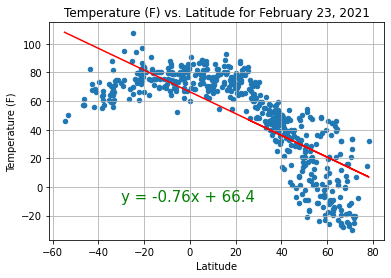

In [16]:
# Create a series of scatterplots to showcase the following relationships:

# Temperature (F) vs. Latitude
# This is not needed, obtained Temp in F from the API
# convert temperature from Kelvin to Fahrenheit
# wx_df['temp_f'] = wx_df['temp_k'] * 9/5 - 459.67

title = f'Temperature (F) vs. Latitude for {today}'
wx_df.plot(kind='scatter', x='lat', y='temperature', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

x_values = wx_df['lat']
y_values = wx_df['temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,-10), fontsize=15, color='green')

# set the figure size
#fig = plt.figure(figsize=(10,5))
# save the plot as an image
plt.savefig('../output_data/temp v lat')


# TODO: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html
plt.show()

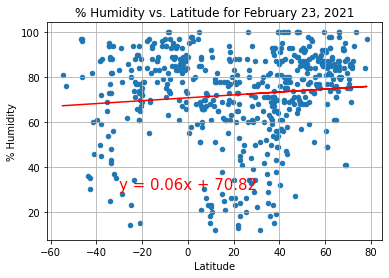

In [17]:
# Humidity (%) vs. Latitude
title = f'% Humidity vs. Latitude for {today}'
wx_df.plot(kind='scatter', x='lat', y='humidity', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
x_values = wx_df['lat']
y_values = wx_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq=f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,30), fontsize=15,color='red')

plt.savefig('../output_data/humid v lat')

plt.show()

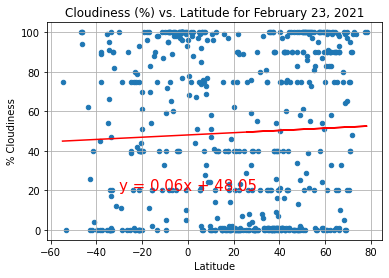

In [18]:
# Cloudiness (%) vs Latitude
title = f'Cloudiness (%) vs. Latitude for {today}'
wx_df.plot(kind='scatter', x='lat', y='clouds', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")

x_values = wx_df['lat']
y_values = wx_df['clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,20), fontsize=15, color='red')

plt.savefig('../output_data/cloud v lat')


plt.show()

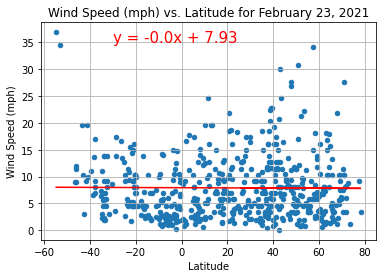

In [19]:
# Wind Speed (mph) vs. Latitude
title = f'Wind Speed (mph) vs. Latitude for {today}'
wx_df.plot(kind='scatter', x='lat', y='windspeed', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

x_values = wx_df['lat']
y_values = wx_df['windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,35), fontsize=15, color='red')

plt.savefig('../output_data/wind v lat')

plt.show()

In [20]:
# Inspect the data and remove the cities where the humidity > 100%.
#high_humid_df = wx_df[wx_df['humidity'] > 80]
#high_humid_df

wx_df = wx_df[wx_df['humidity'] < 101]
wx_df
## Skip this step if there are no cities that have humidity > 100%.

,Country,City ID,lon,lat,temperature,max temperature,humidity,clouds,windspeed
City,,,,,,,,,
Ushuaia,AR,3833367,-68.3000,-54.8000,46.40,46.40,81,75,36.82
Tasiilaq,GL,3424607,-37.6368,65.6145,23.00,23.00,74,20,2.48
Padang,ID,1633419,100.3543,-0.9492,86.00,86.00,66,20,4.61
Bluff,NZ,2206939,168.3333,-46.6000,57.00,57.00,97,100,8.99
Mataura,NZ,6201424,168.8643,-46.1927,57.00,57.00,97,100,8.99
...,...,...,...,...,...,...,...,...,...
Kirensk,RU,2022083,108.1119,57.7853,1.78,1.78,89,100,6.73
Bandarbeyla,SO,64814,50.8122,9.4942,76.30,76.30,68,24,13.53
Irbeyskoye,RU,1505529,95.4522,55.6428,-1.30,-1.30,90,83,4.00


In [21]:
wx_df.count


<bound method DataFrame.count of             Country  City ID       lon      lat  temperature  max temperature  \
City                                                                            
Ushuaia          AR  3833367  -68.3000 -54.8000        46.40            46.40   
Tasiilaq         GL  3424607  -37.6368  65.6145        23.00            23.00   
Padang           ID  1633419  100.3543  -0.9492        86.00            86.00   
Bluff            NZ  2206939  168.3333 -46.6000        57.00            57.00   
Mataura          NZ  6201424  168.8643 -46.1927        57.00            57.00   
...             ...      ...       ...      ...          ...              ...   
Kirensk          RU  2022083  108.1119  57.7853         1.78             1.78   
Bandarbeyla      SO    64814   50.8122   9.4942        76.30            76.30   
Irbeyskoye       RU  1505529   95.4522  55.6428        -1.30            -1.30   
Dzaoudzi         YT   921900   45.2699 -12.7887        80.60            80.6

In [22]:
# Run Linear Regression on each relationship.
# Separate the plots int Northern Hemi (>=0 degrees lat) and 
north_df = wx_df[wx_df['lat'] >= 0]
north_df

,Country,City ID,lon,lat,temperature,max temperature,humidity,clouds,windspeed
City,,,,,,,,,
Tasiilaq,GL,3424607,-37.6368,65.6145,23.00,23.00,74,20,2.48
Kiruna,SE,605155,20.2251,67.8557,-0.40,-0.40,92,75,1.14
Xingyi,CN,1787599,102.8170,24.1877,65.34,65.34,47,89,18.32
Saint Paul Harbor,US,5866583,-152.4072,57.7900,37.40,37.40,75,40,5.75
Northam,GB,2641434,-4.2167,51.0333,54.34,55.00,92,100,17.00
...,...,...,...,...,...,...,...,...,...
Ardahan,TR,751952,42.7022,41.1087,12.29,12.29,95,97,2.57
Kirensk,RU,2022083,108.1119,57.7853,1.78,1.78,89,100,6.73
Bandarbeyla,SO,64814,50.8122,9.4942,76.30,76.30,68,24,13.53


In [23]:
# Southern Hemi ( < 0 degrees lat)
south_df = wx_df[wx_df['lat'] < 0]
south_df.count


<bound method DataFrame.count of                   Country  City ID       lon      lat  temperature  \
City                                                                 
Ushuaia                AR  3833367  -68.3000 -54.8000        46.40   
Padang                 ID  1633419  100.3543  -0.9492        86.00   
Bluff                  NZ  2206939  168.3333 -46.6000        57.00   
Mataura                NZ  6201424  168.8643 -46.1927        57.00   
Maumere                ID  1635815  122.2111  -8.6199        80.19   
...                   ...      ...       ...      ...          ...   
Correntina             BR  3465373  -44.6367 -13.3433        70.07   
Banjar                 ID  1650232  114.9675  -8.1900        86.00   
São João da Barra      BR  3448903  -41.0511 -21.6403        74.39   
Codrington             AU  2171099  141.9667 -38.2667        63.73   
Dzaoudzi               YT   921900   45.2699 -12.7887        80.60   

                   max temperature  humidity  clouds  wi

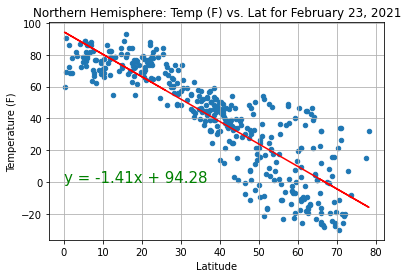

In [24]:
# Northern Hemisphere
# Temperature (F) vs. Latitude

title = f'Northern Hemisphere: Temp (F) vs. Lat for {today}'
north_df.plot(kind='scatter', x='lat', y='temperature', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

x_values = north_df['lat']
y_values = north_df['temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(0,0), fontsize=15, color='green')

plt.savefig('../output_data/northern hemi temp v lat')

plt.show()


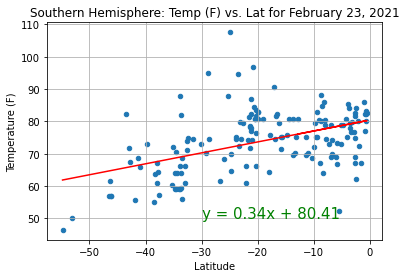

In [25]:
# Southern Hemisphere
# Temperature (F) vs. Latitude

title = f'Southern Hemisphere: Temp (F) vs. Lat for {today}'
south_df.plot(kind='scatter', x='lat', y='temperature', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

x_values = south_df['lat']
y_values = south_df['temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'

plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(-30,50), fontsize=15, color='green')

plt.savefig('../output_data/southern hemi temp v lat')

plt.show()

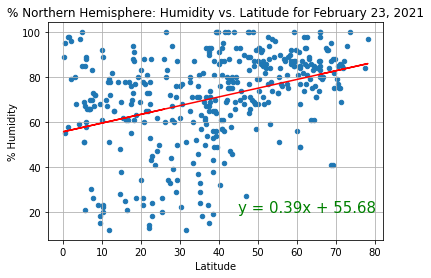

In [26]:
# Northern Hemisphere: Humidity (%) vs. Latitude
title = f'% Northern Hemisphere: Humidity vs. Latitude for {today}'
north_df.plot(kind='scatter', x='lat', y='humidity', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
x_values = north_df['lat']
y_values = north_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq=f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(45,20), fontsize=15,color='green')

plt.savefig('../output_data/northern hemi humid v lat')

plt.show()

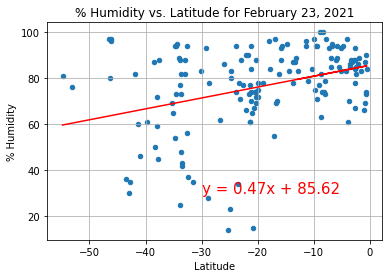

In [27]:
# Southern Hemiphere Humidity (%) vs. Latitude
title = f'% Humidity vs. Latitude for {today}'
south_df.plot(kind='scatter', x='lat', y='humidity', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Humidity")
x_values = south_df['lat']
y_values = south_df['humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq=f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,30), fontsize=15,color='red')

plt.savefig('../output_data/southern hemi humid v lat')

plt.show()

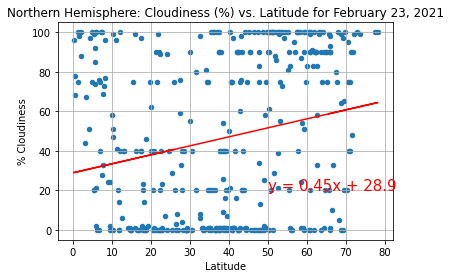

In [28]:
# Northern Hemisphere: Cloudiness (%) vs Latitude
title = f'Northern Hemisphere: Cloudiness (%) vs. Latitude for {today}'
north_df.plot(kind='scatter', x='lat', y='clouds', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")

x_values = north_df['lat']
y_values = north_df['clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(50,20), fontsize=15, color='red')

plt.savefig('../output_data/northern hemi cloud v lat')

plt.show()

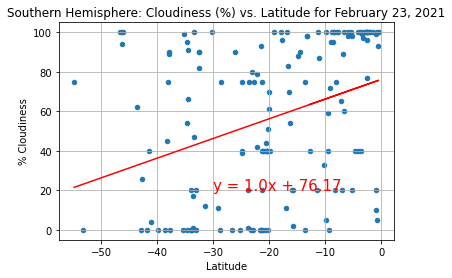

In [29]:
# Southern Hemisphere: Cloudiness (%) vs Latitude
title = f'Southern Hemisphere: Cloudiness (%) vs. Latitude for {today}'
south_df.plot(kind='scatter', x='lat', y='clouds', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("% Cloudiness")

x_values = south_df['lat']
y_values = south_df['clouds']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-30,20), fontsize=15, color='red')

plt.savefig('../output_data/southern hemi cloud v lat')

plt.show()

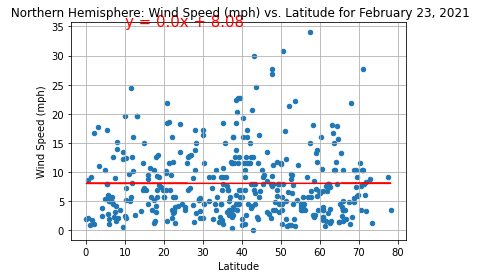

In [30]:
# Northern Hemisphere: Wind Speed (mph) vs. Latitude
title = f' Northern Hemisphere: Wind Speed (mph) vs. Latitude for {today}'
north_df.plot(kind='scatter', x='lat', y='windspeed', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

x_values = north_df['lat']
y_values = north_df['windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(10,35), fontsize=15, color='red')

plt.savefig('../output_data/northern hemi wind v lat')

plt.show()

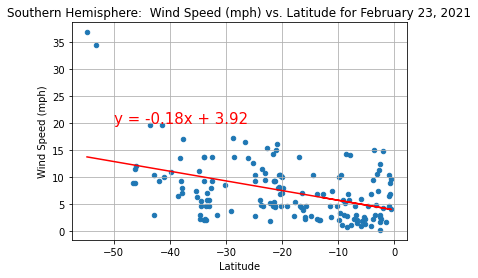

In [31]:
# Southern Hemisphere: Wind Speed (mph) vs. Latitude
title = f'Southern Hemisphere:  Wind Speed (mph) vs. Latitude for {today}'
south_df.plot(kind='scatter', x='lat', y='windspeed', grid=True, title=title)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

x_values = south_df['lat']
y_values = south_df['windspeed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values, regress_values, "r-")
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
plt.annotate(line_eq,(-50,20), fontsize=15, color='red')

plt.savefig('../output_data/southern hemi wind v lat')

plt.show()

In [ ]:
## Save the plotted figures as .pngs.